<a href="https://colab.research.google.com/github/akashglol/StockModel/blob/main/aistockpredictionmdoel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
stock_data = yf.download('NVDA', start = '2014-07-01', end = '2024-07-01')
stock_data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-01,0.463000,0.471500,0.461500,0.468750,0.446221,321180000
2014-07-02,0.467000,0.469000,0.464250,0.467000,0.444555,179284000
2014-07-03,0.462750,0.472500,0.462750,0.471250,0.448601,136892000
2014-07-07,0.472000,0.472250,0.466750,0.467500,0.445031,127496000
2014-07-08,0.466250,0.468250,0.459250,0.463750,0.441461,221940000
...,...,...,...,...,...,...
2024-06-24,123.239998,124.459999,118.040001,118.110001,118.110001,476060900
2024-06-25,121.199997,126.500000,119.320000,126.089996,126.089996,425787500
2024-06-26,126.129997,128.119995,122.599998,126.400002,126.400002,362975900


In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))


In [ ]:

import numpy as np

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)



In [ ]:
time_step = 100
X, y = create_dataset(scaled_data, time_step)

train_size=0.8
X_train, X_test = X[:int(X.shape[0]*train_size)], X[int(X.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]



In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=64))
model.add(Dense(units=64))
model.add(Dense(units=1))



In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64)



Epoch 1/10
31/31 [==============================] - 13s 184ms/step - loss: 8.0046e-04
Epoch 2/10
31/31 [==============================] - 4s 123ms/step - loss: 5.1169e-05
Epoch 3/10
31/31 [==============================] - 5s 152ms/step - loss: 3.8933e-05
Epoch 4/10
31/31 [==============================] - 6s 177ms/step - loss: 3.6674e-05
Epoch 5/10
31/31 [==============================] - 4s 141ms/step - loss: 3.5945e-05
Epoch 6/10
31/31 [==============================] - 5s 166ms/step - loss: 3.6051e-05
Epoch 7/10
31/31 [==============================] - 4s 128ms/step - loss: 3.5548e-05
Epoch 8/10
31/31 [==============================] - 4s 125ms/step - loss: 3.5787e-05
Epoch 9/10
31/31 [==============================] - 5s 147ms/step - loss: 3.3283e-05
Epoch 10/10
31/31 [==============================] - 5s 147ms/step - loss: 3.0162e-05


In [ ]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)



16/16 [==============================] - 1s 29ms/step - loss: 0.0015
Test Loss: 0.0015440897550433874


In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)



16/16 [==============================] - 2s 44ms/step


In [ ]:
original_data = stock_data['Close'].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)



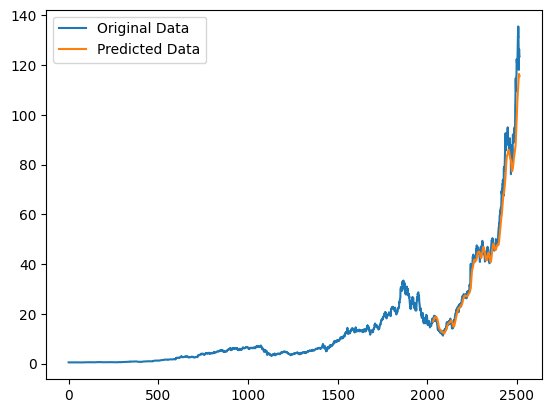

In [ ]:
import matplotlib.pyplot as plt

plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()



In [ ]:
new_predictions = model.predict(X_test[-90:])
new_predictions = scaler.inverse_transform(new_predictions)

predicted_data = np.append(predicted_data, new_predictions)
predicted_data[-90:]



3/3 [==============================] - 0s 28ms/step


array([ 68.48569489,  68.73960114,  68.64076233,  68.99230957,
        69.61406708,  70.39422607,  71.2037735 ,  71.91519165,
        72.60301971,  73.41802979,  74.43638611,  75.55977631,
        76.84364319,  78.38333893,  79.664711  ,  80.59391022,
        81.60378265,  82.51780701,  83.12987518,  83.50073242,
        83.72239685,  83.88433838,  84.05138397,  84.27159882,
        84.68247223,  85.22602081,  85.66868591,  85.87918854,
        85.93238831,  85.87525177,  85.69143677,  85.40765381,
        84.88957214,  84.38735962,  83.86754608,  83.26412964,
        82.75301361,  82.55012512,  82.40623474,  82.18528748,
        82.01983643,  81.69009399,  81.32183838,  80.4307251 ,
        79.47815704,  78.71414948,  77.9509964 ,  77.42943573,
        77.40814209,  77.71044159,  78.12728119,  78.39105988,
        78.71414948,  79.22870636,  80.03436279,  80.8751297 ,
        81.68042755,  82.30688477,  82.84657288,  83.32084656,
        83.77740479,  84.38941193,  85.03764343,  85.55

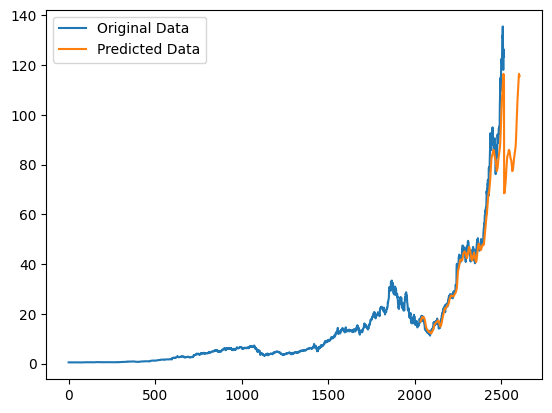

In [ ]:
plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
# Ensure X_input is correctly reshaped before prediction loop
X_input = scaled_data[-time_step:].reshape(1, time_step, 1)

# Predict the next week's stock prices
predictions = []
for _ in range(7):
    next_prediction = model.predict(X_input)
    predictions.append(next_prediction[0, 0])
    # Update X_input correctly for the next prediction
    X_input = np.append(X_input[:, 1:, :], next_prediction.reshape(1, 1, 1), axis=1)

# Inverse transform predictions
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate dates for the next week
dates = [datetime.now().date() + timedelta(days=i) for i in range(7)]

# Plotting the predictions
plt.figure(figsize=(14, 7))
plt.plot(dates, predicted_prices, marker='o', linestyle='-', color='orange', label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Predicted Stock Prices for the Next Week')
plt.legend()
plt.grid(True)
plt.show()

# Print the predicted opening and closing prices for each day
print("Predicted Opening and Closing Prices for the Next Week:")
for i, date in enumerate(dates):
    print(f"{date}: Open: {predicted_prices[i][0]:.2f}, Close: {predicted_prices[i][0]:.2f}")


NameError: name 'scaled_data' is not defined